# Giliad and Nvo - Ratio spread, no residual no Kalman

### Entry Threshold:	2.50	Exit Threshold:	0.20 | Max Duration:	25 days |	

### MA Period:	30	SMA	| StdDev Period:	30 | RSI Period:	14	RSI Threshold:	0 | 		


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [35]:
start= datetime.datetime(2015, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 9, 30)

In [36]:
ticker_1 = "gild"
ticker_2 = "nvo"

In [37]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [38]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,67.489998,65.959999,66.750000,66.519997,4814700.0,66.519997
2019-09-16,66.430000,65.660004,66.290001,65.879997,4644100.0,65.879997
2019-09-17,66.239998,65.279999,65.900002,66.169998,4819800.0,66.169998
2019-09-18,66.150002,65.110001,66.010002,65.720001,4295400.0,65.720001
2019-09-19,66.440002,65.639999,65.849998,65.959999,4171100.0,65.959999


In [39]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,50.029999,49.340000,49.630001,49.500000,1560300.0,49.500000
2019-09-16,49.799999,49.169998,49.529999,49.480000,965400.0,49.480000
2019-09-17,51.090000,50.580002,50.740002,50.970001,1773200.0,50.970001
2019-09-18,51.200001,50.779999,51.029999,50.970001,1345800.0,50.970001
2019-09-19,52.029999,51.580002,51.750000,51.880001,1801800.0,51.880001


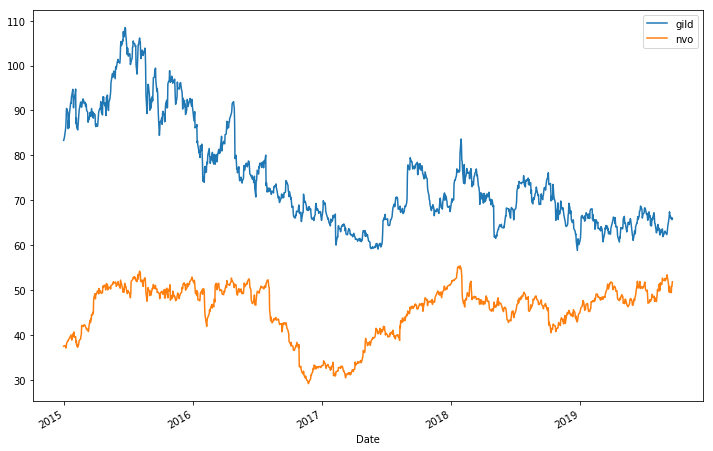

In [40]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [41]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

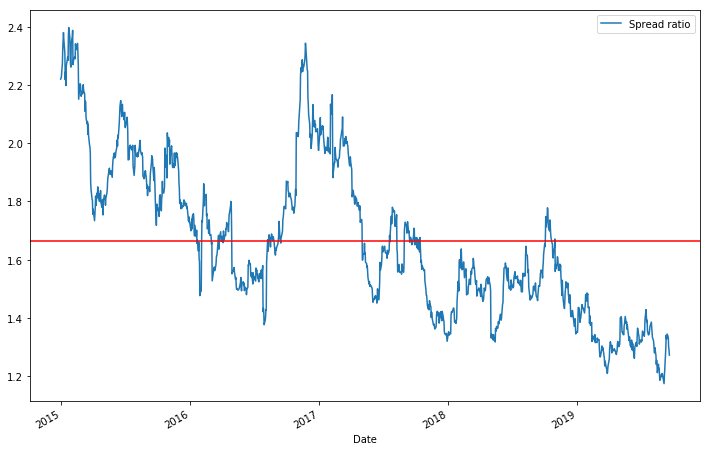

In [42]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [43]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

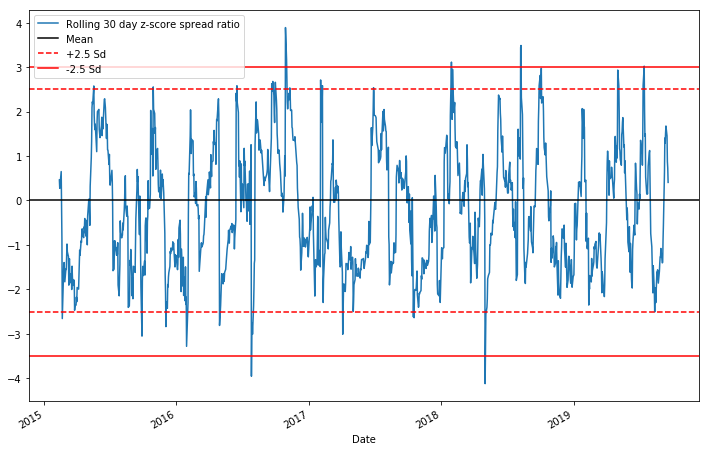

In [44]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.5, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.5, color='red', linestyle='-')
plt.axhline(-2.5, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2.5 Sd', '-2.5 Sd']);

In [45]:
from statsmodels.tsa.stattools import coint

In [46]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [47]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [48]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair gild VS nvo: -1.9615481194728719
Alpha value for the T-stat:  0.5484987286510374
--------------------------------------
T-stat 99%:  -3.9056903329029953
T-stat 95%:  -3.3412823572910404
T-stat 90%:  -3.048024971770138


In [49]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.41952218],
       [0.41952218, 1.        ]])

In [50]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[141.69920361,  29.70425154],
       [ 29.70425154,  35.38017479]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [51]:
zscore_30_1_ratio

Date
2014-12-31         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03         NaN
2015-02-04         NaN
2015-02-05         NaN
2015-02-06         NaN
2015-02-09         NaN
2015-02-10         NaN
2015-02-11         NaN
2015-02-12    0.460134
                ...   
2019-08-08   -2.078986
2019-08-09   -1.469064
2019-08-12   -2.044694
2019-08-13   -2.508494
2019-08-14   -1.965504
2019-08-15   -2.072813
2019-08-16   -2.298668
2019-08-19   -1.609572
2019-08-20   -1.702012
2019-08-21   -1.561086
2019-08-22   -1.699090
2019-08-23   -1.859514
2019-0

In [52]:
spread_ratio

Date
2014-12-31    2.221099
2015-01-02    2.227467
2015-01-05    2.275875
2015-01-06    2.324044
2015-01-07    2.350209
2015-01-08    2.381290
2015-01-09    2.358822
2015-01-12    2.309554
2015-01-13    2.218784
2015-01-14    2.247060
2015-01-15    2.198962
2015-01-16    2.267530
2015-01-20    2.296723
2015-01-21    2.285703
2015-01-22    2.369414
2015-01-23    2.398483
2015-01-26    2.365169
2015-01-27    2.302414
2015-01-28    2.271322
2015-01-29    2.262396
2015-01-30    2.345992
2015-02-02    2.367396
2015-02-03    2.388933
2015-02-04    2.271061
2015-02-05    2.280705
2015-02-06    2.291019
2015-02-09    2.296876
2015-02-10    2.290785
2015-02-11    2.342597
2015-02-12    2.329517
                ...   
2019-08-08    1.278736
2019-08-09    1.297262
2019-08-12    1.270439
2019-08-13    1.239370
2019-08-14    1.253611
2019-08-15    1.238556
2019-08-16    1.210912
2019-08-19    1.240077
2019-08-20    1.225681
2019-08-21    1.226101
2019-08-22    1.207319
2019-08-23    1.184839
2019-0

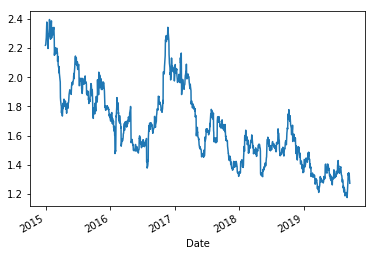

In [53]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)
spread_ratio.plot();


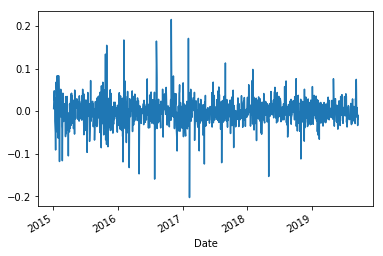

In [54]:
t_series_lag_1.plot()

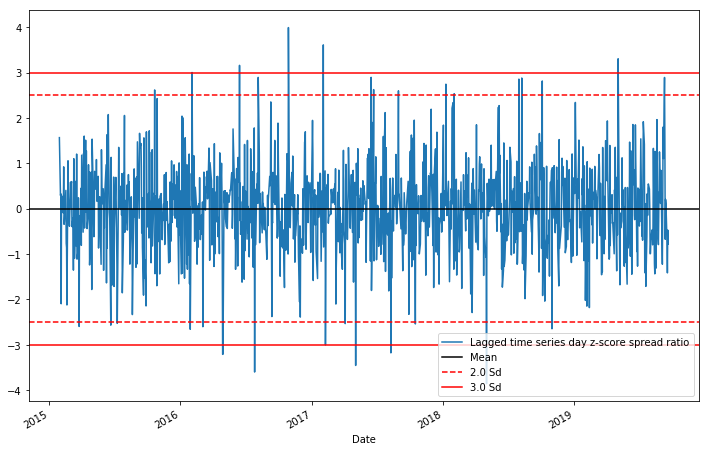

In [55]:
#1 day moving average of the price spread
spreadratio_t_series_lag_mavg_1 = t_series_lag_1.rolling(1).mean()

# Timeseries with one lag
spreadratio_t_series_lag_mavg_30 = t_series_lag_1.rolling(20).mean()

# Take a rolling 30 day standard deviation
std_dev_ratio = t_series_lag_1.rolling(20).std()

# Compute the z score for each day
zscore_t_series_lag = (spreadratio_t_series_lag_mavg_1 - spreadratio_t_series_lag_mavg_30)/std_dev_ratio



zscore_t_series_lag.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.5, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.5, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

In [56]:
t_series_lag_1

Date
2014-12-31         NaN
2015-01-02    0.006368
2015-01-05    0.048408
2015-01-06    0.048169
2015-01-07    0.026165
2015-01-08    0.031081
2015-01-09   -0.022468
2015-01-12   -0.049269
2015-01-13   -0.090769
2015-01-14    0.028275
2015-01-15   -0.048098
2015-01-16    0.068568
2015-01-20    0.029193
2015-01-21   -0.011020
2015-01-22    0.083711
2015-01-23    0.029069
2015-01-26   -0.033314
2015-01-27   -0.062755
2015-01-28   -0.031092
2015-01-29   -0.008926
2015-01-30    0.083596
2015-02-02    0.021403
2015-02-03    0.021537
2015-02-04   -0.117872
2015-02-05    0.009644
2015-02-06    0.010314
2015-02-09    0.005857
2015-02-10   -0.006091
2015-02-11    0.051812
2015-02-12   -0.013080
                ...   
2019-08-08   -0.011503
2019-08-09    0.018526
2019-08-12   -0.026823
2019-08-13   -0.031068
2019-08-14    0.014240
2019-08-15   -0.015055
2019-08-16   -0.027644
2019-08-19    0.029165
2019-08-20   -0.014396
2019-08-21    0.000420
2019-08-22   -0.018782
2019-08-23   -0.022480
2019-0